<a href="https://colab.research.google.com/github/rania-azad/DL-Project1-10-07-2024/blob/main/Hands_on_2_Convolution_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🚀 Deep Learning Hands-On: Convolutional Neural Networks with MNIST in PyTorch

Welcome to our exciting hands-on session on Deep Learning! In this workshop, we're going to dive into the fascinating world of Convolutional Neural Networks (CNNs) 🧠. Our focus will be on understanding and implementing CNNs using the famous MNIST dataset, a collection of handwritten digits that serves as a benchmark for image classification tasks.

### What Will You Learn? 📚
- **Basics of Convolutional Neural Networks:** Get to grips with the fundamental concepts of CNNs, including convolutional layers, pooling, and feature maps.
- **PyTorch in Action:** Implement these concepts in PyTorch, one of the most popular frameworks for deep learning.
- **Hands-On with MNIST:** Train a CNN on the MNIST dataset to classify handwritten digits.
- **Visualization Techniques:** Learn how to visualize feature maps to understand what your CNN is learning.
- **Model Evaluation:** We'll not only train our model but also evaluate its performance and learn how to fine-tune it for better results.

### Let's Get Started! 🌟
Prepare to embark on a journey through neural networks, where you'll get hands-on experience with training, visualizing, and evaluating your very own CNN model. Let's decode the mysteries of deep learning together!


In [ ]:
[[1, 2, 3]
 [4, 5, 6]]

[1, 2, 3, 4, 5, 6]


In [1]:
import torch                                    # PyTorch is a deep learning framework, torch is the library that trains and builds neural networks
import torch.nn as nn                           # neural network layers + losses
import torch.optim as optim                     # define optimizer (Stochastic Gradient Descent, Adam, RMSProp, Grad..)
from torchvision import datasets, transforms    # standard datasets, transformations, standard models
from torch.utils.data import DataLoader         # prepare data for training (split into batches)
from torch.functional import F                  # defines functional layers

<h2>Feature Learning</h2>

Feature engineering is the process of extracting useful patterns from input data that will help the prediction model to understand better the real nature of the problem. A good feature learning will present patterns in a way that significantly increase the accuracy and performance of the applied machine learning algorithms in a way that would otherwise be impossible or too expensive by just machine learning itself.

Feature learning algorithms finds the common patterns that are important to distinguish between the wanted classes and extract them automatically. After this process, they are ready to be used in a classification or regression problem.

The great advantage of CNNs is that they are uncommonly good at finding features in images that grow after each level, resulting in high-level features in the end. The final layers (can be one or more) use all these generated features for classification or regression.

Basically, Convolutional Neural Networks is your best friend to <b>automatically do Feature Engineering</b> (Feature Learning) without wasting too much time creating your own codes and with no prior need of expertise in the field of Feature Engineering.
<br>

<img src="https://ibm.box.com/shared/static/urzzkc7o5loqrlezcvn4kr594mxi9ftx.png" alt="HTML5 Icon" style="width: 650px; height: 250px;">
<center>
    Example of feature learning (automatically feature engineering), starting with simple features and ending with high-level features like human faces. <a href="https://devblogs.nvidia.com/parallelforall/deep-learning-nutshell-core-concepts/">ref</a>
</center>


## Loading the MNIST Dataset 📚

Before we dive into the architectural complexities of our CNN model, let's start with the fundamentals - loading and preprocessing our dataset. In this section, we will be working with the MNIST dataset, a cornerstone in the world of machine learning for image recognition tasks.


In [2]:
# Import necessary libraries
# Torch contains all the necessary libraries for Deep Learning
import torch
# Torchvision contains different standard Datasets
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations applied on each image
# Transform is used to chain multiple transformation together, here we have:
# convert image to pytorch/tensor type, and normalize the images to speed the process {computation and save memory},
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# TODO: Load the MNIST Desitnation of Download Destination -  download which type (train or test) - List of functions
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# TODO: Create data loaders - we do not shuffle in predicting next word or time series or sequences (order relation)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 37607516.53it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1877810.75it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13921044.53it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7914635.97it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Building Our Convolutional Neural Network (CNN) 🏗️

With our MNIST dataset loaded and preprocessed, it's time to embark on the core journey of our hands-on session - developing a Convolutional Neural Network (CNN). In this section, we'll design and implement our CNN architecture using PyTorch.


In [57]:
# 1st configuration with 2 layers
# A convolution layer in pytorch is defined with these parameters:
# input channel (if RGB = 3, if grayscaled = 1), output channel (usually 16,32,64 ), kernel size (3,5,7), stride (use 1)

# CNN Class Definition
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #Input_nb_channel, #output_channel, #kernel size
        # Input size = 1, 28, 28
        # formula to compute output = ((W-K+2P)/Stride) + 1
        #self.conv1: The first convolutional layer. It takes a 1-channel input (for grayscale images), produces 16 output channels (feature maps), and uses a 3x3 kernel
        self.conv1 = nn.Conv2d(1, 16, 3)  #  (28-3+0)/1 + 1 = 26 input channel (if RGB = 3, if grayscaled = 1), output channel (usually 16,32,64 ), kernel size (3,5,7)
        #The second convolutional layer. It takes 16 input channels (from the previous layer), produces 32 output channels, and uses a 3x3 kernel with padding=1.
        self.conv2 = nn.Conv2d(16, 32, 3) #  (13-3+0)/1 + 1  = 11


        # Output: (32, 5x5)
        # why 5??
        self.fc1 = nn.Linear(64*5*5,10)

    #Forward Pass - how the input tensor flows through the network.
    def forward(self, x):
        # F.relu: Applies the ReLU activation function, introducing non-linearity.
        x = F.relu(self.conv1(x))  #  (16, 26x26)
        # F.max_pool2d: Downsamples the input, reducing the spatial dimensions (e.g., from 28x28 to 14x14).
        x = F.max_pool2d(x, kernel_size=2, stride=2)  # add pooling layer  (pytorch doc is your friend) (16, 13x13)

        x = F.relu(self.conv2(x)) #  (32, 11x11)
        x = F.max_pool2d(x, kernel_size=2, stride=2)  # add pooling layer (32, 5x5)



        # Flatten the tensor  to be fed into the fully connected layer.
        x = x.view(-1,32*5*5)
        # Fully connected layer
        x = self.fc1(x)
        # F.softmax(x, dim=1): Applies the softmax function to the output, converting it into probabilities for each class.
        return F.softmax(x, dim=1)

    # Extract Features - Returns the feature maps after the first and second convolutional layers. This can be useful for visualizing or analyzing how the network learns features at different layers.
    def extract_features(self, x):
        x1 = F.relu(self.conv1(x))
        x = F.max_pool2d(x1, kernel_size=2, stride=2)

        x2 = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        return x1, x2

model = CNN()

In [61]:
#3rd configuration with 3 layers
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Input: (1, 28, 28)
        self.conv1 = nn.Conv2d(1, 16, 3)  # Output: (16, 26, 26)
        self.conv2 = nn.Conv2d(16, 32, 3) # Output: (32, 24, 24)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)  # Output: (64, 12, 12)

        # Fully connected layer with adjusted input size
        self.fc1 = nn.Linear(64 * 2 * 2, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Output: (16, 26, 26)
        x = F.max_pool2d(x, kernel_size=2, stride=2)  # Output: (16, 13, 13)

        x = F.relu(self.conv2(x))  # Output: (32, 11, 11)
        x = F.max_pool2d(x, kernel_size=2, stride=2)  # Output: (32, 5, 5)

        x = F.relu(self.conv3(x))  # Output: (64, 5, 5)
        x = F.max_pool2d(x, kernel_size=2, stride=2)  # Output: (64, 2, 2)

        # Flatten the tensor to be fed into the fully connected layer
        x = x.view(-1, 64 * 2 * 2)  # Adjusted flattening size

        x = self.fc1(x)
        return F.softmax(x, dim=1)

    def extract_features(self, x):
        x1 = F.relu(self.conv1(x))
        x = F.max_pool2d(x1, kernel_size=2, stride=2)
        x2 = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        return x1, x2

# Instantiate the model
model = CNN()

## Training the Convolutional Neural Network 🏋️‍♂️

Now that our Convolutional Neural Network (CNN) is set up and ready, it's time to move on to one of the most crucial steps in the machine learning pipeline - training the model. In this section, we will train our CNN using the MNIST dataset, guiding it through the process of learning how to accurately classify handwritten digits.


In [62]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        val_loss = 0.0
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_accuracy = correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies


In [63]:
import matplotlib.pyplot as plt
# This function plots the model complexity graph
def plot_model_complexity_graph(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b-', label='Training Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

Epoch 1/20, Train Loss: 2.3006, Validation Loss: 2.2985, Train Accuracy: 0.2212, Validation Accuracy: 0.3065
Epoch 2/20, Train Loss: 2.2948, Validation Loss: 2.2885, Train Accuracy: 0.2857, Validation Accuracy: 0.2351
Epoch 3/20, Train Loss: 2.2429, Validation Loss: 2.1257, Train Accuracy: 0.2312, Validation Accuracy: 0.3762
Epoch 4/20, Train Loss: 1.8872, Validation Loss: 1.7667, Train Accuracy: 0.6525, Validation Accuracy: 0.7184
Epoch 5/20, Train Loss: 1.7425, Validation Loss: 1.7205, Train Accuracy: 0.7365, Validation Accuracy: 0.7499
Epoch 6/20, Train Loss: 1.7167, Validation Loss: 1.7059, Train Accuracy: 0.7533, Validation Accuracy: 0.7619
Epoch 7/20, Train Loss: 1.7048, Validation Loss: 1.7018, Train Accuracy: 0.7618, Validation Accuracy: 0.7634
Epoch 8/20, Train Loss: 1.6975, Validation Loss: 1.6931, Train Accuracy: 0.7675, Validation Accuracy: 0.7711
Epoch 9/20, Train Loss: 1.6923, Validation Loss: 1.6871, Train Accuracy: 0.7712, Validation Accuracy: 0.7773
Epoch 10/20, Train 

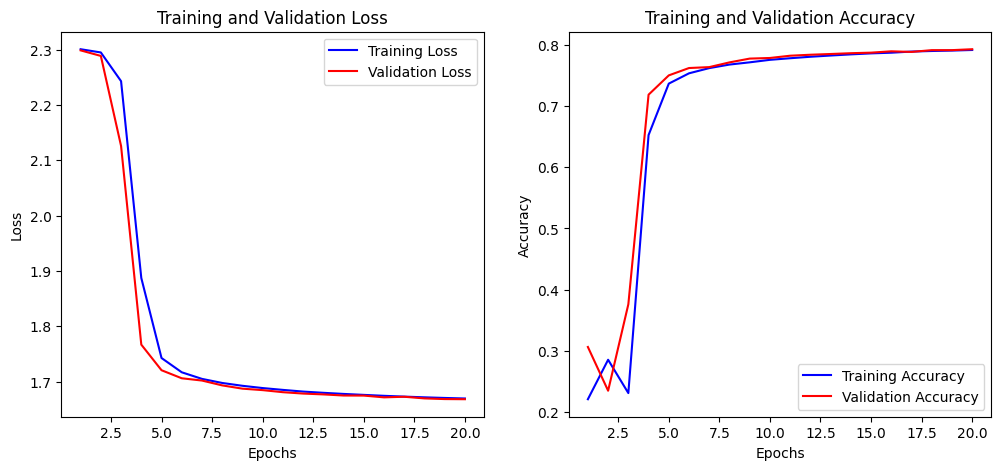

In [64]:
criterion = nn.CrossEntropyLoss()

# sum(y - y') = y - (w1*x1 + w2*x2)
#      dE/dw1 = x1


optimizer = optim.SGD(model.parameters(), lr=0.01)

# run the two functions
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    # put here the arguments for the training function
    model, train_loader, test_loader, criterion, optimizer, epochs=20
)

plot_model_complexity_graph(train_losses, val_losses, train_accuracies, val_accuracies)

### TODO: Comment on the model complexity graph and compare it with the fully connected one.

## BONUS PART: Visualizing the Learned Features of the CNN 🔍

After training our Convolutional Neural Network on the MNIST dataset, an intriguing question arises: "What has our network learned?" In this section, we aim to shed light on this by visualizing the features extracted by the CNN's convolutional layers.

### Why Visualize Features? 🤔
- **Understanding the Model:** Visualization helps us understand what features the network finds significant in the input data.
- **Debugging the Model:** If the model is not performing as expected, examining these visualizations can help identify what the model is focusing on and where it might be going wrong.
- **Enhancing Intuition:** For educational purposes, these visualizations can greatly enhance our intuition about how convolutional networks process and interpret image data.

In [65]:
import matplotlib.pyplot as plt

def visualize_feature_maps(model, image, layer_num):
    model.eval()
    with torch.no_grad():
        conv1_output, conv2_output = model.extract_features(image.unsqueeze(0))

    if layer_num == 1:
        layer_output = conv1_output
    elif layer_num == 2:
        layer_output = conv2_output
    else:
        raise ValueError("Invalid layer number")

    layer_output = layer_output.squeeze(0).cpu()

    fig, axes = plt.subplots(1, layer_output.size(0), figsize=(20, 2))
    for i, ax in enumerate(axes):
        ax.imshow(layer_output[i].detach().numpy(), cmap='gray')
        ax.axis('off')
    plt.show()

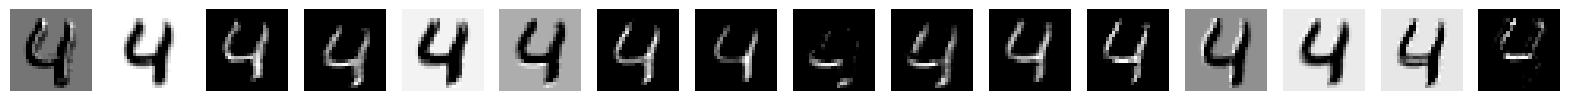

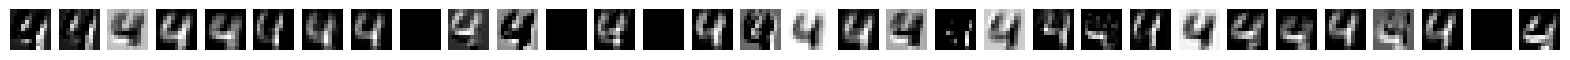

In [66]:
# TODO: try different images and compare the result
# Load a sample image from the dataset
sample_image, _ = next(iter(test_loader))
sample_image = sample_image[4]  # Get the first image in the batch

# Visualize feature maps for the first convolutional layer
visualize_feature_maps(model, sample_image, layer_num=1)

# Visualize feature maps for the second convolutional layer
visualize_feature_maps(model, sample_image, layer_num=2)

### TODO: comment the feature maps
### TODO: Redo the full thing with a deeper network and compare.

This is the result of the default code:
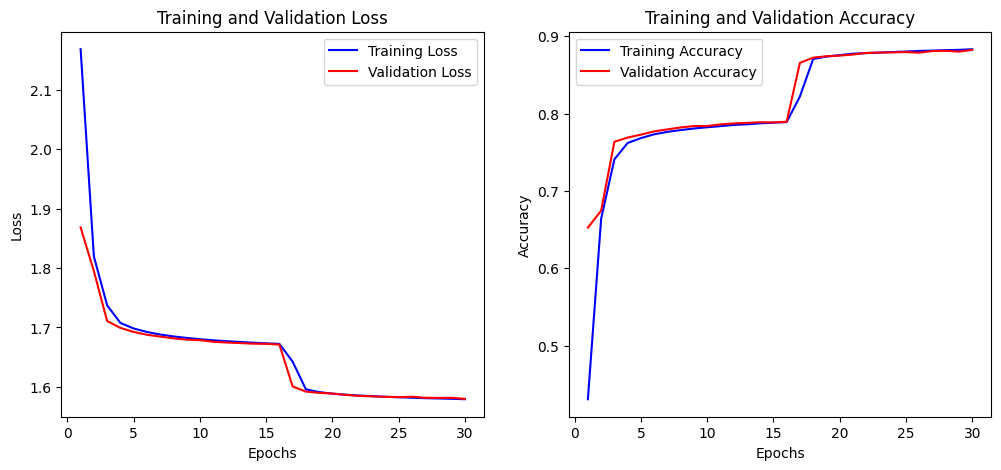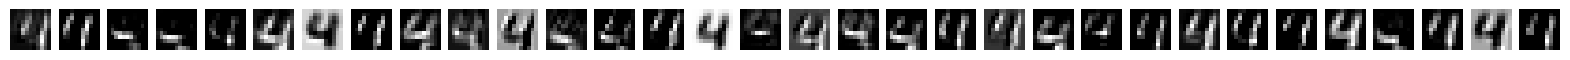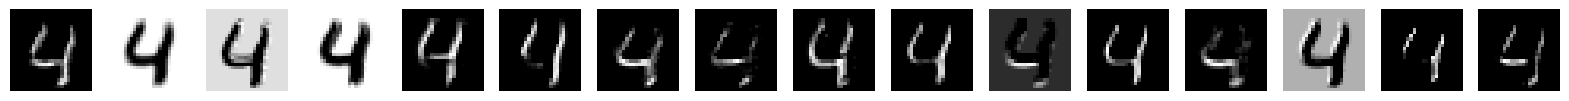

2nd configuration, decrease the epochs from 30 to 10
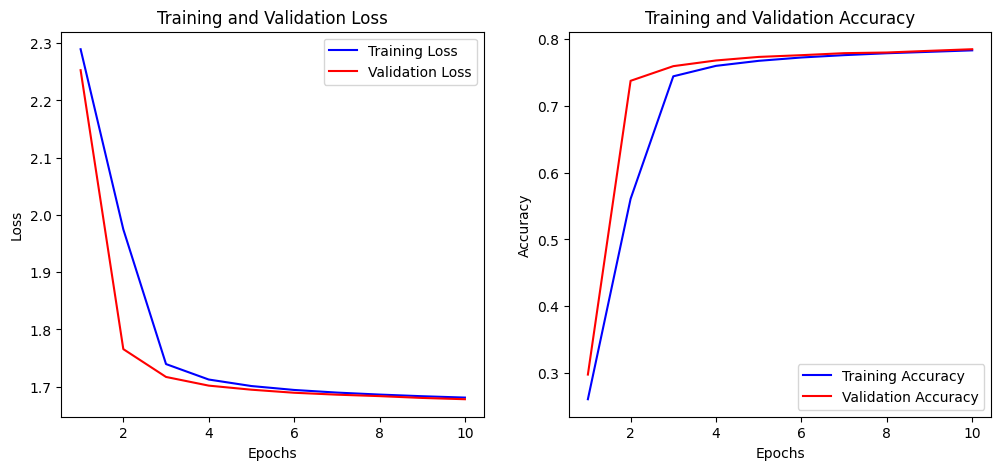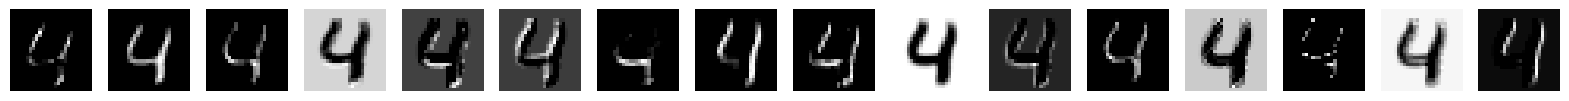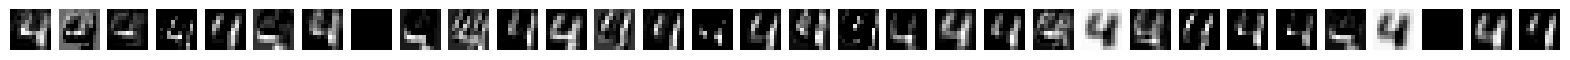

3rd configuration
### To make the CNN complex, I added 3rd layer
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)  # Example 3rd Conv Layer
### Add 3rd Conv Layer
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
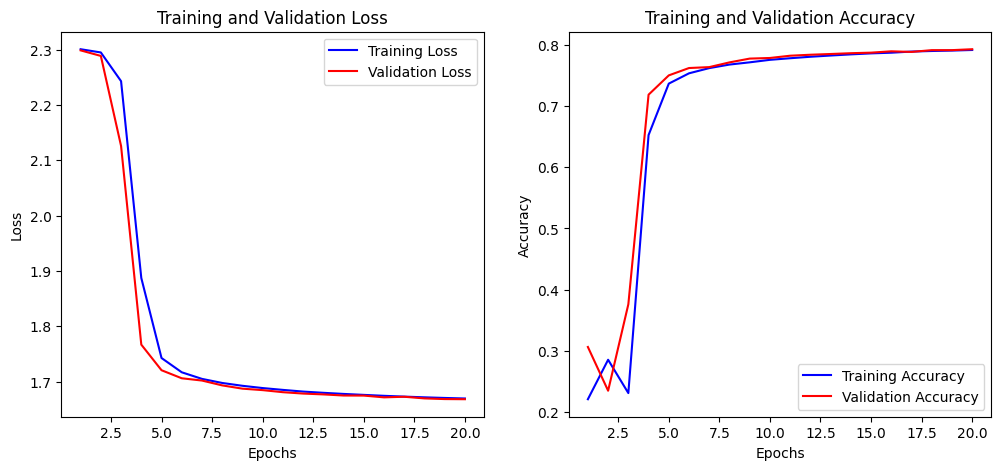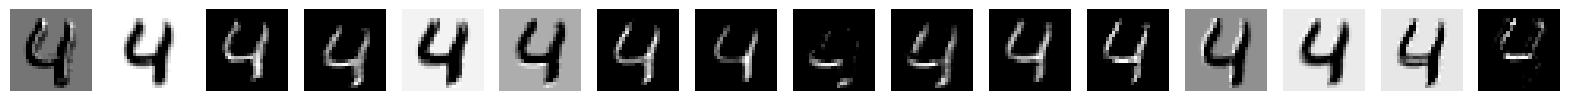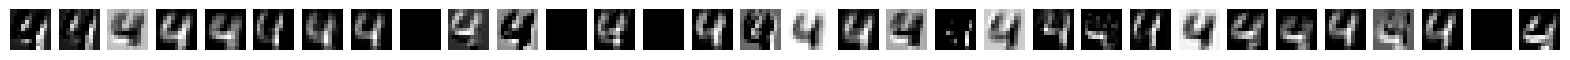